In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("NYHCSurvey.csv")
df1 = df.iloc[0:1004,2:8]
df1

,6am_9am,9am_noon,Noon_2pm,2pm_5pm,5pm_9pm,9pm_close
0,18,50,41,76,69,41
1,66,14,86,62,71,46
2,60,43,43,26,91,58
3,59,48,62,15,91,15
4,21,24,59,45,81,131
...,...,...,...,...,...,...
995,9,91,101,70,17,24
996,31,98,85,71,25,12
997,23,33,43,45,30,23
998,16,93,42,59,29,26


In [17]:
offpeak = df1[['6am_9am','9am_noon','Noon_2pm','2pm_5pm','9pm_close']] -65
peak = df1['5pm_9pm']
offpeak

,6am_9am,9am_noon,Noon_2pm,2pm_5pm,9pm_close
0,-47,-15,-24,11,-24
1,1,-51,21,-3,-19
2,-5,-22,-22,-39,-7
3,-6,-17,-3,-50,-50
4,-44,-41,-6,-20,66
...,...,...,...,...,...
995,-56,26,36,5,-41
996,-34,33,20,6,-53
997,-42,-32,-22,-20,-42
998,-49,28,-23,-6,-39


In [18]:
offpeak['max_value']= offpeak.max(axis=1)
offmax = offpeak['max_value']
offmax

0      11
1      21
2      -5
3      -3
4      66
       ..
995    36
996    33
997   -20
998    28
999    -2
Name: max_value, Length: 1000, dtype: int64

In [9]:
#result = 0
mylist = []
for price in range(35,125):
    peak_new = peak - price
    result = peak_new.sub(offmax) >= 0
    count = np.sum(result==True)
    percentage = count / 1000
    mylist.append(percentage)
len(mylist)
#mylist

90

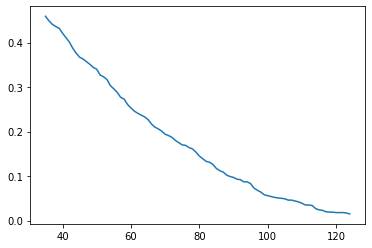

In [10]:
import matplotlib.pyplot as plt
price =list(range(35,125))
#print(len(price))
plt.plot(price,mylist)

In [11]:
demand = pd.DataFrame([price,mylist],index=['price','percentage'])
#demand = pd.DataFrame([price,mylist],columns=['price','percentage'])
demand

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
price,35.000,36.000,37.000,38.000,39.000,40.000,41.000,42.000,43.000,44.000,...,115.000,116.000,117.00,118.000,119.000,120.000,121.000,122.000,123.000,124.000
percentage,0.459,0.449,0.441,0.436,0.432,0.421,0.411,0.401,0.387,0.376,...,0.024,0.023,0.02,0.019,0.019,0.018,0.018,0.018,0.017,0.015


In [12]:
#question3
df1_copy = df1.copy()
df1_copy

,6am_9am,9am_noon,Noon_2pm,2pm_5pm,5pm_9pm,9pm_close
0,18,50,41,76,69,41
1,66,14,86,62,71,46
2,60,43,43,26,91,58
3,59,48,62,15,91,15
4,21,24,59,45,81,131
...,...,...,...,...,...,...
995,9,91,101,70,17,24
996,31,98,85,71,25,12
997,23,33,43,45,30,23
998,16,93,42,59,29,26


In [13]:
offpeak1 = df1_copy[['6am_9am','9am_noon','Noon_2pm','2pm_5pm','9pm_close']]
peak1 = df1_copy['5pm_9pm']

In [15]:
dem = pd.DataFrame(columns = ["p0", "p59"])

,p0,p59


In [16]:
for p0 in range(35,125):
    for p59 in range(35,125):
        offpeak_nu = offpeak1 - p0
        peak_nu = peak1 - p59
        netmax = offpeak_nu.max(axis=1)
        result = peak_nu.sub(netmax) >= 0
        d59 = np.sum(result==True)
        d0 = np.sum(result!=True)
        #percent = np.sum(result==True) / 1000
        dem =dem.append(pd.DataFrame({'p0':[p0],'p59':[p59],'demand0':[d0],'demand59':[d59]}))
dem

,p0,p59,demand0,demand59
0,35,35,773.0,227.0
0,35,36,783.0,217.0
0,35,37,790.0,210.0
0,35,38,794.0,206.0
0,35,39,799.0,201.0
...,...,...,...,...
0,124,120,754.0,246.0
0,124,121,759.0,241.0
0,124,122,763.0,237.0
0,124,123,767.0,233.0


In [17]:
import seaborn as sns

In [64]:
X1 = dem[['p0','p59']]
y1 = dem['demand0']

In [72]:
X2 = dem[['p0','p59']]
y2 = dem['demand59']

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [67]:
X1_train, X1_test, y1_train, y1_test =train_test_split(X1,y1, test_size= 0.4,random_state = 101)

In [73]:
X2_train, X2_test, y2_train, y2_test =train_test_split(X2,y2, test_size=0.4,random_state = 101)

In [69]:
lm1 = LinearRegression()

In [71]:
lm1.fit(X1_train,y1_train)
lm1.coef_
print(lm1.intercept_)
print(lm1.coef_)
#D0(p0,p59) = 722.57 – 5.86*p0 + 5.83*p59

722.5674327020504
[-5.85831726  5.83443863]


In [75]:
lm2 = LinearRegression()

In [77]:
lm2.fit(X2_train,y2_train)
lm2.coef_
print(lm2.intercept_,lm2.coef_)
#D59(p0,p59) = 277.43 + 5.86*p0 - 5.83*p59

277.4325672979497 [ 5.85831726 -5.83443863]
